## Define the function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import cv2

# load, normalize, and resize
def load_transform(filepath, 
                   img_size=(16, 16), 
                   conv_to_theta=True,
                   contrast=1, 
                   equalize=True,                   
                   crop=True,
                   flatten=True):
    
    """
    flatten (True/False) - flatten to a vector
    """
    
    # =============================================
    # Assume that this is part of the image collection        

    img = Image.open(filepath)
        
    # Assume that this is part of the image collection
    img = img.resize((128, 128))                
        
    # get the middle patch    
    img = np.array(img)
    
    if crop:
        loc = img.shape[0] // 3
        img = img[loc:loc*2, loc:loc*2] 
    
        
    # equalize histogram
    if equalize:
        
        # Set the lower threshold value to target high intensity areas
        lower_threshold = 50

        # Create the mask to discard
        _, mask = cv2.threshold(img, lower_threshold, 255, cv2.THRESH_BINARY)     
        masked_equalized_image = cv2.equalizeHist(img * (mask // 255))
        img = cv2.addWeighted(img, 0.5, masked_equalized_image, 0.5, 0)
        
        # img = cv2.equalizeHist(img)    
    
    # Assume that this is part of the image collection
    img = Image.fromarray(img)
    img = img.resize(img_size) # bicubic
    
    # change contrast
    #image brightness enhancer
    if contrast != 1:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(contrast)     
    
    # normalize
    img = np.array(img) / 255 # normalize
    
    if conv_to_theta:
        img = img * np.pi / 2 # convert to number between 0 and pi/2
    
    if flatten:
        img = img.flatten()
    
    return img

## Test on One image

In [2]:
img_size = (16, 16)

In [3]:
# Flattened
filepath = 'data/train/NonDemented/nonDem1498.jpg'
img = load_transform(filepath)
print(img.mean(), img.std())
print(img)

0.7949268911151378 0.43928539626195057
[0.11087974 0.75151824 1.42911666 1.3675168  1.26279705 1.04103757
 0.41271903 0.08007981 0.09239978 0.36343915 0.90551788 1.281277
 1.48455653 1.23199712 0.23407945 0.14167967 0.08007981 0.09855977
 0.6406385  1.3675168  1.47223656 1.29975696 1.00407765 0.72071831
 0.6837584  1.08415746 1.39215674 1.49071651 1.36135682 0.5543987
 0.06775984 0.14783965 0.11087974 0.11087974 0.0862398  0.35727916
 0.97327772 1.42911666 1.55231637 1.53383641 1.50303649 1.51535646
 1.50919647 1.40447672 0.61599856 0.10471976 0.06775984 0.32647924
 0.33263922 0.06775984 0.14783965 0.14167967 0.09855977 0.54207873
 1.25663706 1.47223656 1.49071651 1.3675168  1.19503721 0.71455833
 0.16631961 0.09855977 0.10471976 0.73303829 1.07183749 0.48663886
 0.30799928 0.27103937 0.1293597  0.05543987 0.32031925 0.54823872
 0.5112788  0.37575912 0.43735898 0.37575912 0.40039906 0.38191911
 0.8131181  1.3243969  1.39831673 1.2381571  1.03487758 0.84391803
 0.61599856 0.39423908 0.2

## To Crop

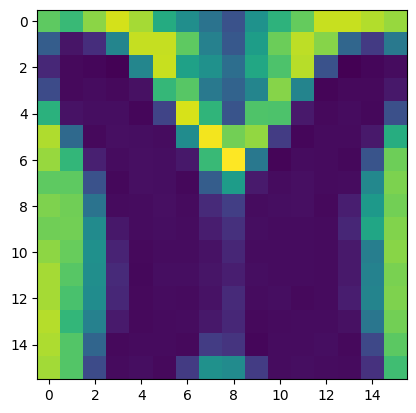

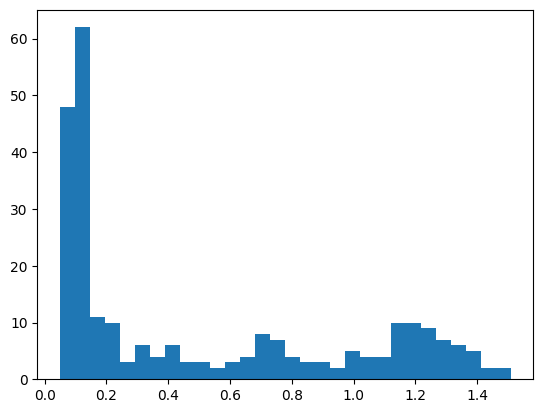

In [13]:
import glob

img_size = (16, 16)

to_crop = glob.glob("data/selected_images/test_dem_3.jpg")

# run for all
to_crop = np.array([load_transform(f, img_size=img_size, flatten=False) for f in to_crop])

# save
np.save('data/processed/to_crop.npy', to_crop)

plt.imshow(np.array(to_crop[0]))
plt.show()
plt.hist(to_crop[0].flatten(), bins=30)
plt.show()

## Run on All images - Brain

In [ ]:
img_size = (16, 16)

In [ ]:
import glob
# train_set_0 = glob.glob("data/train/NonDemented/*.jpg")
# train_set_0 = glob.glob("data/train/NonDemented/nonDem2185.jpg")
train_set_0 = ["data/train/nonDemented/nonDem1329.jpg", "data/train/nonDemented/nonDem1117.jpg"]
train_set_1 = []

# for k in ['VeryMild', 'Mild', 'Moderate']:
for k in ['Moderate']:
    train_set_1 += glob.glob(f"data/train/{k}Demented/moderateDem42.jpg")    

# test_set_0 = glob.glob("data/test/NonDemented/*.jpg")
# test_set_1 = []

test_set_0 = glob.glob("data/selected_images/test_nondem_*.jpg")
test_set_1 = glob.glob("data/selected_images/test_dem_*.jpg")
ref = ["data/selected_images/ref.jpg"]

# for k in ['Moderate']:
#     test_set_1 += glob.glob(f"data/test/{k}Demented/*.jpg")

print("train_set_0", len(train_set_0))
print("train_set_1", len(train_set_1))

print("test_set_0", len(test_set_0))
print("test_set_1", len(test_set_1))

In [ ]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in test_set_1])

ref_b = np.array([load_transform(f, img_size=img_size, flatten=False) for f in ref])

# save
np.save('data/processed/train_set_mtx_0.npy', train_set_0b)
np.save('data/processed/train_set_mtx_1.npy', train_set_1b)

np.save('data/processed/test_set_mtx_0.npy', test_set_0b)
np.save('data/processed/test_set_mtx_1.npy', test_set_1b)

np.save('data/processed/ref_mtx.npy', ref_b)

plt.imshow(np.array(train_set_0b[0]))
plt.show()
plt.hist(train_set_0b[0].flatten(), bins=30)
plt.show()

plt.imshow(np.array(train_set_1b[0]))
plt.show()
plt.hist(train_set_1b[0].flatten(), bins=30)
plt.show()

plt.imshow(np.array(ref_b[0]))
plt.show()
plt.hist(ref_b[0].flatten(), bins=30)
plt.show()

In [ ]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size) for f in test_set_1])

ref_b = np.array([load_transform(f, img_size=img_size) for f in ref])

# save
np.save('data/processed/train_set_0.npy', train_set_0b)
np.save('data/processed/train_set_1.npy', train_set_1b)

np.save('data/processed/test_set_0.npy', test_set_0b)
np.save('data/processed/test_set_1.npy', test_set_1b)

np.save('data/processed/ref.npy', ref_b)

plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()

## Get an average Reference Image

In [ ]:
train_set_0 = glob.glob("data/train/NonDemented/*.jpg")
train_set_1 = []
for k in ['Moderate']:
    train_set_1 += glob.glob(f"data/train/{k}Demented/*.jpg")

In [ ]:
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False, contrast=1) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False, contrast=1) for f in train_set_1])

print(len(train_set_0b), len(train_set_1b))

f, axs = plt.subplots(1, 2)
train_set_0_mean = train_set_0b.mean(axis=0)
train_set_1_mean = train_set_1b.mean(axis=0)

axs[0].imshow(train_set_0_mean)
axs[1].imshow(train_set_1_mean)

np.save('data/processed/train_set_0_mean.npy', train_set_0_mean)
np.save('data/processed/train_set_1_mean.npy', train_set_1_mean)

In [ ]:
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=True, contrast=1) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=True, contrast=1) for f in train_set_1])

train_mean_0 =train_set_0b.mean(axis=1)
train_mean_1 =train_set_1b.mean(axis=1)

train_std_0 =train_set_0b.std(axis=1)
train_std_1 =train_set_1b.std(axis=1)

plt.hist(train_mean_0, bins=20, alpha=1, density=True, cumulative=True, histtype='step')
plt.hist(train_mean_1, bins=20, alpha=1, density=True, cumulative=True, histtype='step')
plt.show()

plt.hist(train_std_0, bins=20, alpha=1, density=True, cumulative=True, histtype='step')
plt.hist(train_std_1, bins=20, alpha=1, density=True, cumulative=True, histtype='step')
plt.show()

In [ ]:
import seaborn as sns

# Generate data
bins=50
hist_2d_0, x_edges, y_edges = np.histogram2d(train_mean_0, train_std_0, bins=bins)
hist_2d_1, x_edges, y_edges = np.histogram2d(train_mean_1, train_std_1, bins=bins)

# Create the heatmap
f, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))
sns.heatmap(hist_2d_0, cmap='viridis', annot=False, linewidths=0, ax=axs[0])
sns.heatmap(hist_2d_1, cmap='viridis', annot=False, linewidths=0, ax=axs[1])
plt.show()


## Appendix: Run on All images - MNIST

In [ ]:
import glob
train_set_0 = glob.glob("data/mnist_train/0/*.jpg")[:50]
train_set_1 = glob.glob("data/mnist_train/1/*.jpg")[:50]

test_set_0 = glob.glob("data/mnist_test/0/*.jpg")[:50]
test_set_1 = glob.glob("data/mnist_test/1/*.jpg")[:50]

print("train_set_0", len(train_set_0))
print("train_set_1", len(train_set_1))

print("test_set_0", len(test_set_0))
print("test_set_1", len(test_set_1))

In [ ]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, crop=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, crop=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, crop=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, crop=False) for f in test_set_1])

# save
np.save('data/processed/mnist_train_set_0.npy', train_set_0b)
np.save('data/processed/mnist_train_set_1.npy', train_set_1b)

np.save('data/processed/mnist_test_set_0.npy', test_set_0b)
np.save('data/processed/mnist_test_set_1.npy', test_set_1b)

In [ ]:
plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()

In [ ]:
# run for all
train_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in train_set_0])
train_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in train_set_1])

test_set_0b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in test_set_0])
test_set_1b = np.array([load_transform(f, img_size=img_size, flatten=False, crop=False) for f in test_set_1])

# save
np.save('data/processed/mnist_train_set_mtx_0.npy', train_set_0b)
np.save('data/processed/mnist_train_set_mtx_1.npy', train_set_1b)

np.save('data/processed/mnist_test_set_mtx_0.npy', test_set_0b)
np.save('data/processed/mnist_test_set_mtx_1.npy', test_set_1b)

plt.imshow(np.array(test_set_1b[0]))
plt.show()
plt.hist(test_set_1b[0].flatten(), bins=30)
plt.show()